# Сборный проект №1: Анализ факторов успеха видеоигр: прогноз популярности и планирование рекламных кампаний на 2017 год
# Описание данных

    Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Инструкция по выполнению проекта***
1. ***Шаг 1.*** Откройте файл с данными и изучите общую информацию.

2. ***Шаг 2.*** Подготовьте данные.
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

3. ***Шаг 3.*** Проведите исследовательский анализ данных.
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. ***Шаг 4.*** Составьте портрет пользователя каждого региона.
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. ***Шаг 5.*** Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
    Поясните:
    - Как вы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.
    
6. ***Шаг 6.*** Напишите общий вывод.
- Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

***Описание данных***
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

#### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('./games.csv')

In [3]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***Вывод:***

1. В наборе данных присутствуют пропущенные значения в нескольких столбцах. Например, в колонке `Year_of_Release` не хватает данных для 269 записей, что может повлиять на анализ временных тенденций. Столбцы `Critic_Score`, `User_Score`, и `Rating` содержат значительное количество пропусков, что также нужно учитывать при анализе оценок игр.

2. Примерно половина игр не имеет оценок критиков `Critic_Score`, а в столбце `User_Score` пропущено более `40%` данных. Это может ограничивать возможность детального анализа влияния оценок на успешность игры, и требует дополнительной обработки.

#### Шаг 2. Подготовьте данные.

*Замена названий столбцов*

In [4]:
data = data.rename(columns = {'Name': 'name',
                'Platform': 'platform',
                'Year_of_Release': 'year_of_release',
                'Genre': 'genre',
                'NA_sales': 'na_sales',
                'EU_sales': 'eu_sales',
                'JP_sales': 'jp_sales',
                'Other_sales': 'other_sales',
                'Critic_Score': 'critic_score',
                'User_Score': 'user_score',
                'Rating': 'rating'})

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [5]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце «name» есть две пустые ячейки. После анализа данных было решено удалить эти ячейки, так как в них нет информации, которая могла бы помочь восстановить данные.

In [6]:
data = data[data['name'].notna()].reset_index(drop = True)
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
#data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release'].median())
data = data.dropna(subset=['year_of_release'])

In [8]:
data['year_of_release'] = data['year_of_release'].astype(int)
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y')
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
#data['rating'] = data['rating'].fillna('unknown')

In [10]:
data['rating'].isna().sum()

6676

После анализа колонок `critic_score`, `user_score` и `rating` были проведены следующие изменения:
- `critic_score` - пропущенные значения оставленны как NaN, чтобы учитывать только реальные оценки. При дальнейшем анализе появится необходимость строить графики, а с текстовым значением `unknown` появятся проблемы.
- `user_score` - значение `tbd` означает, что оценка не определена. Также при замене этого значения на `unknown` возникнут трудности с анализом, поэтому они заменены на NaN. Пропущенные значения тоже принято не заменять, чтобы не исказить анализ.
- `rating` - пропущенные значения оставленны, чтобы не исказить анализ.

In [11]:
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Явных дубликатов не выявлено.

In [12]:
explict_duplicated = data[data.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = False)].index
explict_duplicated

Int64Index([604, 16228], dtype='int64')

In [13]:
data_clean = data.drop(index = explict_duplicated)

Выявлено два дубликата. Они были удалены и перезаписаны очищенные данные в новый датафрейм `data_clean`.

In [14]:
data_clean['total_sales'] = data_clean['na_sales'] + data_clean['eu_sales'] + data_clean['jp_sales'] + data_clean['other_sales']
display(data_clean.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


***Вывод***

В процессе подготовки данных были выполнены следующие шаги:
1. Заменены названия столбцов(приведены к нижнему регистру);
2. Обработаны пропуски:
    - В столбце name были удалены 2 пропуска, потому что строки не содержали информации, которые способствовали восстановлению данных;
    - year_of_release - приведен к типу int, пропущенные значения удалены.
    - critic_score - пропущенные значения оставленны как NaN, чтобы учитывать только реальные оценки. При дальнейшем анализе появится необходимость строить графики, а с текстовым значением unknown появятся проблемы.
    - user_score - значение tbd означает, что оценка не определена. Также при замене этого значения на unknown возникнут трудности с анализом, поэтому они заменены на NaN. Пропущенные значения тоже принято не заменять, чтобы не исказить анализ.
    - rating - пропущенные значения оставленны, чтобы не исказить анализ.
    
3. Добавлен столбец `total_sales` с суммарными продажами во всех регионах.

Уважаемый ревьюер! Я решил разбить работу на части, чтобы выполнять её качественно и постепенно.

#### Шаг 3. Проведите исследовательский анализ данных.

***Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?***

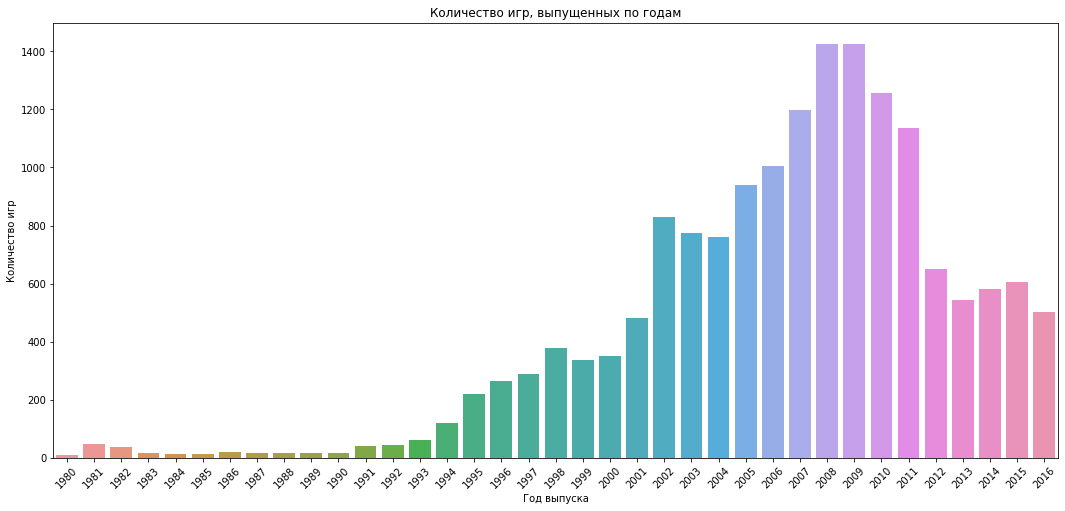

In [15]:
count_game = pd.pivot_table(data = data_clean, values = 'name', index = 'year_of_release', aggfunc = 'count').reset_index()
plt.figure(figsize=(18, 8))
sns.barplot(data = count_game, x = 'year_of_release', y = 'name')
plt.xticks(rotation=45)
plt.title('Количество игр, выпущенных по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

На графике видно, что наибольшее количество игр было выпущено в период с 2002 по 2013 годы, с пиком в 2008 и 2009 годах. После 2010 года наблюдается спад в количестве выпускаемых игр. Данные за весь период (до 2000 года) имеют значительно меньший объём игр, что делает их менее актуальными для анализа современных тенденций. Поэтому для дальнейшего анализа можно сосредоточиться на данных с 2000 года, так как они лучше отражают современные рыночные реалии.

In [16]:
data_after_2014 = data_clean[data_clean['year_of_release'] >= 2014]
data_after_2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


***Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?***

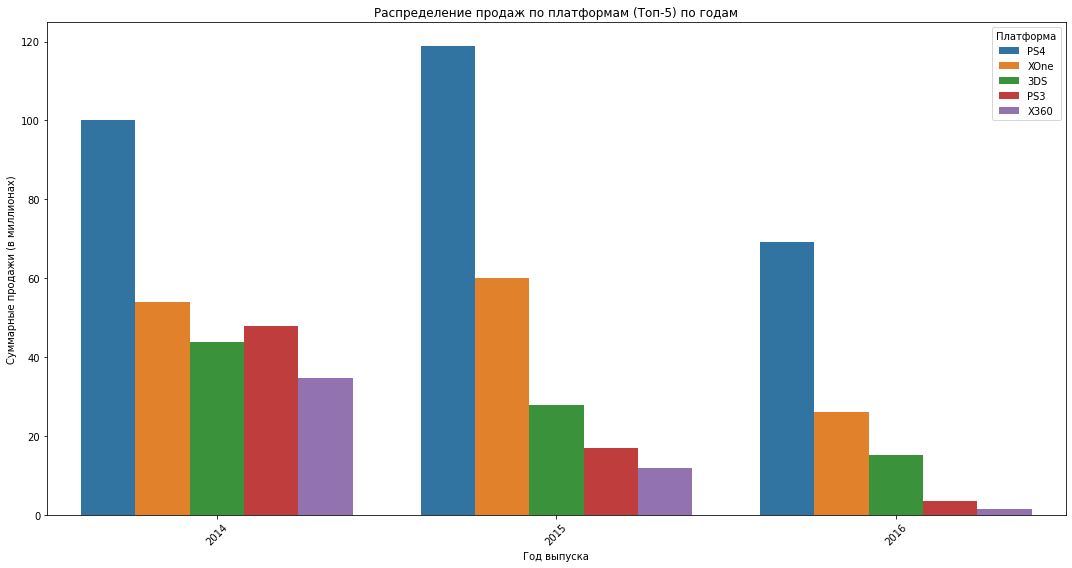

In [17]:
big_sales = pd.pivot_table(data=data_after_2014, values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', fill_value=0)

top_platforms = big_sales.sum().nlargest(5).index

top_platform_sales = big_sales[top_platforms]

top_platform_sales = top_platform_sales.reset_index()

top_platform_sales_melted = top_platform_sales.melt(id_vars='year_of_release', var_name='platform', value_name='total_sales')

plt.figure(figsize=(15, 8))
sns.barplot(data=top_platform_sales_melted, x='year_of_release', y='total_sales', hue='platform')
plt.title('Распределение продаж по платформам (Топ-5) по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.xticks(rotation=45)
plt.legend(title='Платформа')
plt.tight_layout()
plt.show()

1. На графике видно, что платформа `PS4` является лидером продаж на протяжении всего периода с 2014 по 2016 год. Пик продаж `PS4` приходится на 2015 год (более 120 миллионов копий), а затем наблюдается постепенное снижение в 2016 году.

2. Платформа `Xbox One` также показала значительные результаты, занимая второе место по продажам на протяжении всех трех лет. Продажи Xbox One достигли своего пика в 2015 году и начали снижаться в 2016 году.

3. Платформы `3DS`, `PS3` и `X360` уже находились в финальной стадии жизненного цикла и продемонстрировали умеренные продажи. Продажи платформы `PS3` и `X360` значительно снизились к 2016 году, что указывает на завершение их жизненного цикла. Платформа `3DS` также показала постепенное снижение продаж в течение анализируемого периода.

На основании анализа можно сделать вывод, что новые платформы достигают своего пика продаж через `2–3 года` после появления на рынке. После достижения пика продажи начинают снижаться, и платформы постепенно становятся менее актуальными через `5–6 лет` после выпуска. Это позволяет сделать вывод о высокой динамичности рынка консолей: платформы, которые недавно вышли на рынок, могут оставаться актуальными в течение `5–6 лет`, после чего начинают устаревать.

***Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.***

За актуальный период были выбраны данные с 2014 года по 2016 год.Такой период позволяет учитывать только те платформы, которые находятся на стадии активного роста или недавно вышли на рынок. Это поможет более точно спрогнозировать, какие платформы будут успешными в 2017 году и на какие платформы следует направить рекламные усилия.

***Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.***

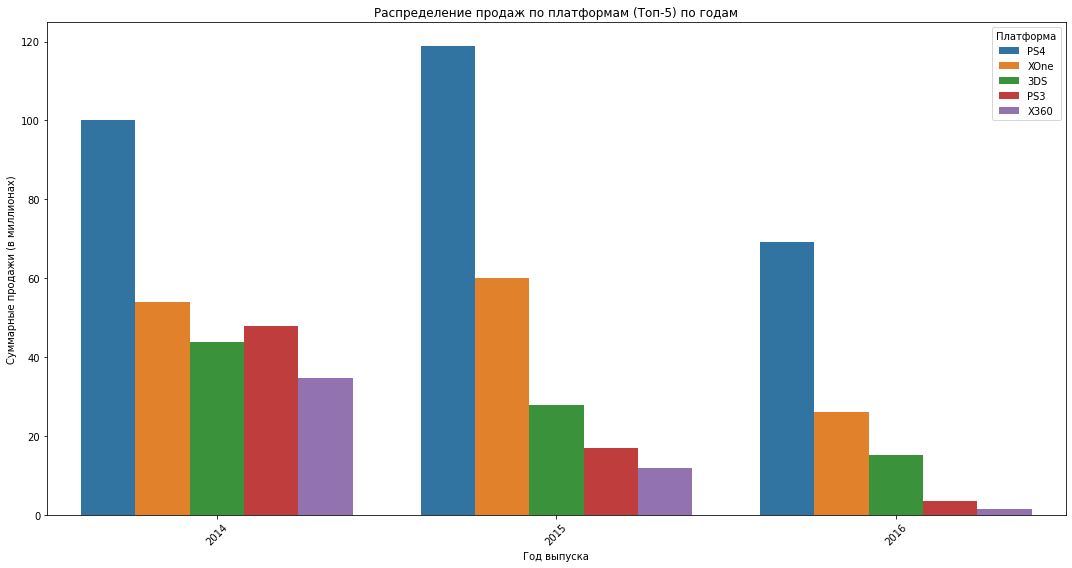

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(data=top_platform_sales_melted, x='year_of_release', y='total_sales', hue='platform')
plt.title('Распределение продаж по платформам (Топ-5) по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.xticks(rotation=45)
plt.legend(title='Платформа')
plt.tight_layout()
plt.show()

***По этому графику можно сделать вывод, что:***

1. По продажам лидируют такие платформы, как:
    1. PS4;
    2. XOne;
    3. PS3;
    4. X360;
    5. 3DS.
2. Суммарные продажи платформы `PS4` резко вырастают и занимают первое место продаж среди 5-ки лидеров платформ, продажи падают в 2016 году.

    Платформа `XOne` имеет стабильные продажи, но в 2016 году начинает падать в продажах.
    
    Наименьшим показателем продаж с 2014 по 2016 год является `PS3` и `X360`. Вероятно это связано с выходом новой серии платформ.
    
3. Потенциально прибыльне платформы:
    1. PS4;
    2. XOne;

***Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.***

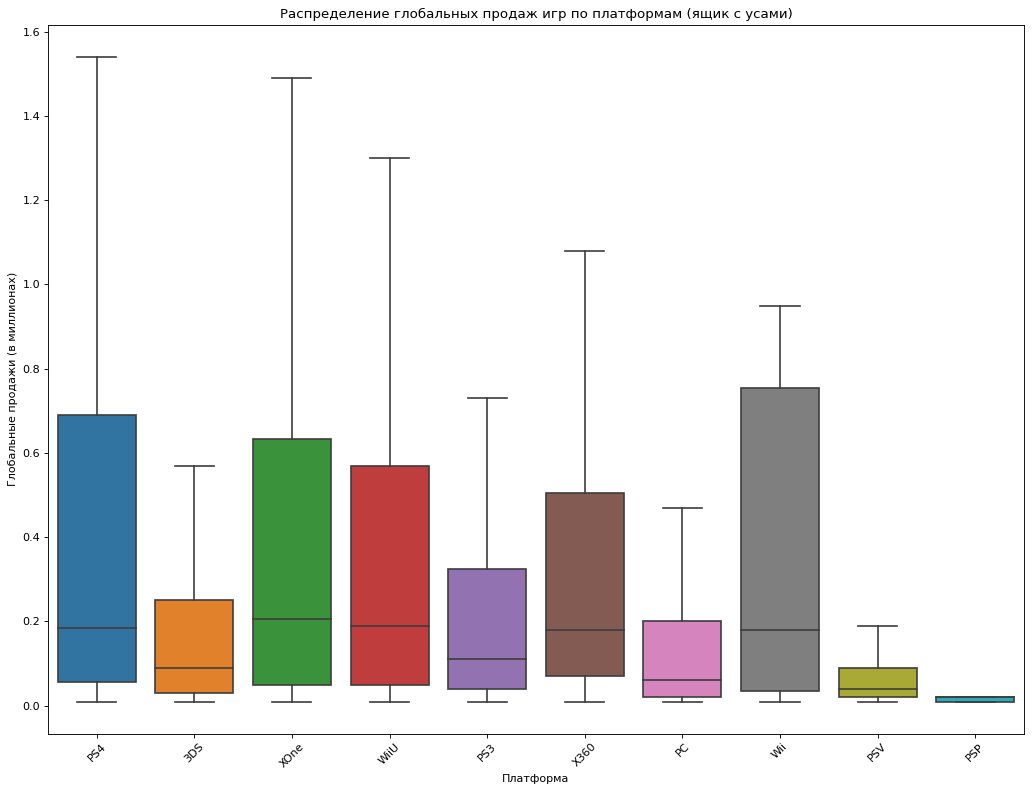

In [19]:
plt.figure(figsize=(13,10), dpi= 80)
ax = sns.boxplot(x=data_after_2014["platform"], y=data_after_2014["total_sales"], showfliers=False)

plt.title("Распределение глобальных продаж игр по платформам (ящик с усами)")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи (в миллионах)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

***На графике отображено распределение глобальных продаж игр в разбивке по платформам:***

- `PS4`, `XOne`, и `WiiU` имеют наибольшие медианные продажи среди платформ на графике, что свидетельствует о популярности отдельных игр на этих консолях и о значительном количестве успешных проектов.

- `3DS`, `PS3`, и `X360` также показывают хорошие медианные продажи, но их медианы ниже по сравнению с `PS4` и `XOne`. Тем не менее, у них наблюдаются длинные усы, что говорит о наличии отдельных игр, которые достигли высоких продаж.

- Платформы `PC`, `PSV`, и `PSP` имеют более низкие медианные продажи. Это указывает на ограниченную популярность игр на этих платформах или на отсутствие массово успешных проектов.

Видно, что у платформ, таких как `X360` и `WiiU`, наблюдаются длинные верхние усы и это говорит о том, что на этих платформах есть игры, которые достигли значительных продаж, несмотря на относительно невысокие медианные значения.

***Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.***

In [20]:
def plot_correlation(dataframe, platform, score_column, sales_column, title):
    platform_data = dataframe[dataframe['platform'] == platform]
    
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x=platform_data[score_column], y=platform_data[sales_column])
    plt.title(f'Зависимость продаж от {title} {platform}')
    plt.xlabel(title)
    plt.ylabel('Суммарные продажи (в миллионах)')
    plt.show()
    
    correlation = platform_data[score_column].corr(platform_data[sales_column])
    print(f"Корреляция между {title.lower()} и продажами: {correlation:.2f}")

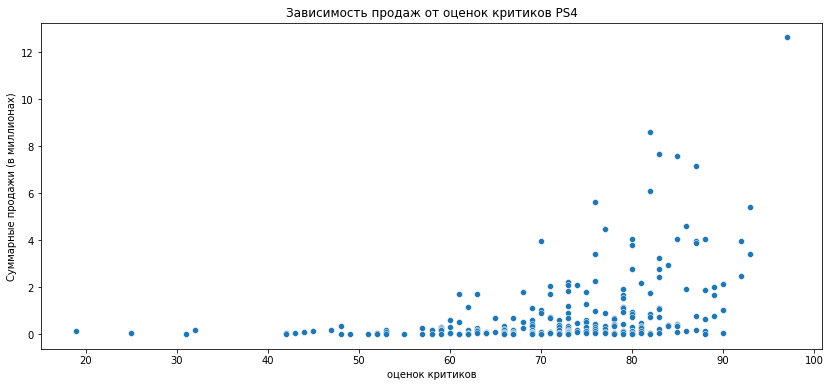

Корреляция между оценок критиков и продажами: 0.40


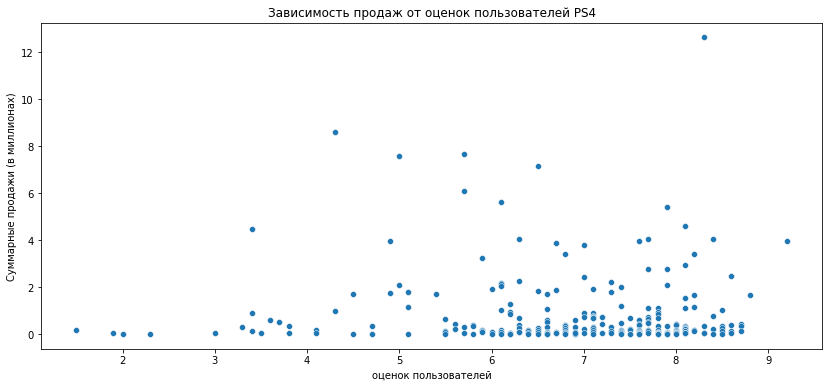

Корреляция между оценок пользователей и продажами: -0.04


In [21]:
platform_ps4 = data_after_2014[data_after_2014['platform'] == 'PS4']

plot_correlation(data_after_2014, 'PS4', 'critic_score', 'total_sales', 'оценок критиков')

plot_correlation(data_after_2014, 'PS4', 'user_score', 'total_sales', 'оценок пользователей')

***Промежуточный вывод:***

1. Корреляция между отзывами критиков и продажами: Значение корреляции составляет 0.40, что указывает на умеренную положительную связь между оценками критиков и продажами. Это означает, что высокие оценки критиков могут быть связаны с более высокими продажами, хотя данная зависимость не является сильной.

2. Корреляция между отзывами пользователей и продажами: Значение корреляции равно -0.04, что указывает на практически отсутствие связи между оценками пользователей и продажами. Это значит, что пользовательские оценки не оказывают существенного влияния на уровень продаж игр на платформе PS4.

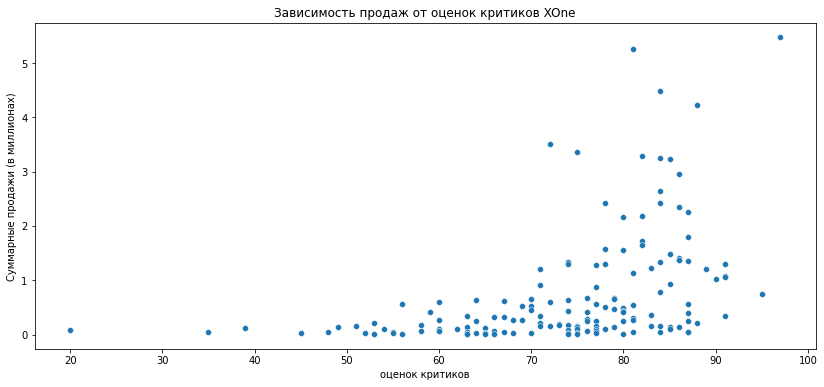

Корреляция между оценок критиков и продажами: 0.43


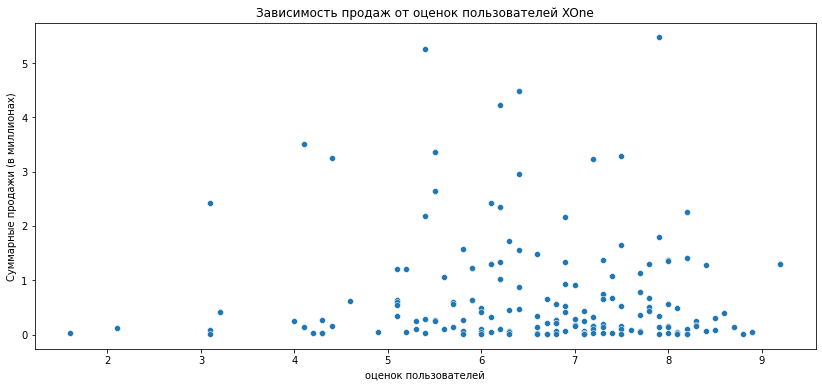

Корреляция между оценок пользователей и продажами: -0.07


In [22]:
platform_xone = data_after_2014[data_after_2014['platform'] == 'XOne']

plot_correlation(data_after_2014, 'XOne', 'critic_score', 'total_sales', 'оценок критиков')

plot_correlation(data_after_2014, 'XOne', 'user_score', 'total_sales', 'оценок пользователей')

***Промежуточный вывод:***

1. Корреляция между отзывами критиков и продажами: Значение корреляции составляет 0.43, что указывает на умеренную положительную связь между оценками критиков и продажами. Это подтверждает, что высокие оценки критиков могут способствовать увеличению продаж игр на платформе Xbox One.

2. Корреляция между отзывами пользователей и продажами: Значение корреляции равно -0.07, что указывает на практически отсутствие связи между оценками пользователей и продажами. Это означает, что оценки пользователей не являются фактором, влияющим на продажи игр для Xbox One.

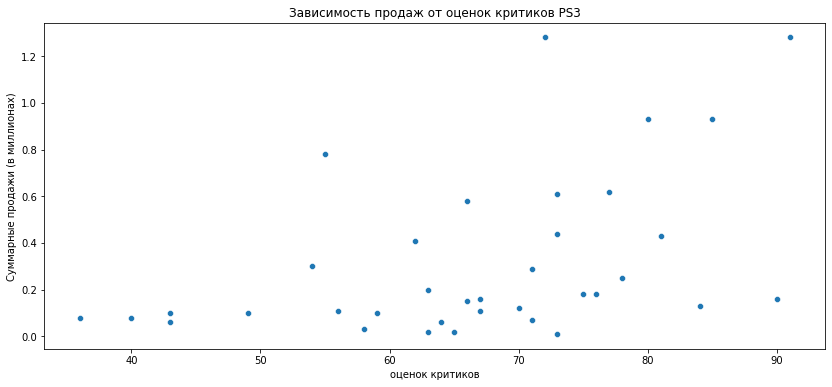

Корреляция между оценок критиков и продажами: 0.45


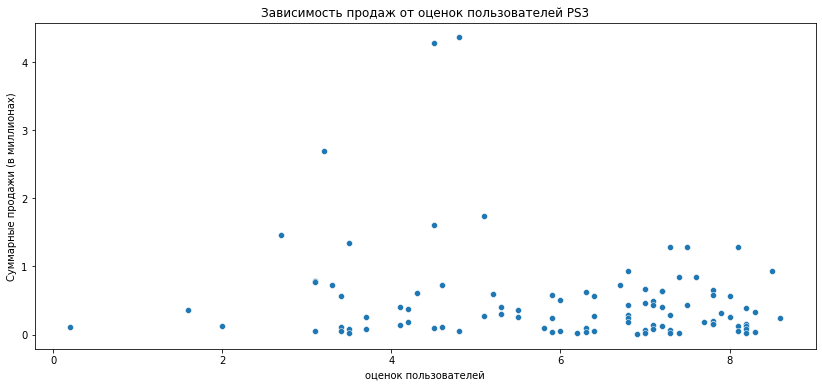

Корреляция между оценок пользователей и продажами: -0.17


In [23]:
platform_ps3 = data_after_2014[data_after_2014['platform'] == 'PS3']

plot_correlation(data_after_2014, 'PS3', 'critic_score', 'total_sales', 'оценок критиков')

plot_correlation(data_after_2014, 'PS3', 'user_score', 'total_sales', 'оценок пользователей')

***Промежуточный вывод:***

1. Корреляция между отзывами критиков и продажами: Значение корреляции составляет 0.45, что указывает на умеренную положительную связь между оценками критиков и продажами игр на платформе PS3. Это означает, что высокие оценки критиков могут способствовать более высоким продажам.

2. Корреляция между отзывами пользователей и продажами: Значение корреляции составляет -0.17, что указывает на слабую отрицательную связь между оценками пользователей и продажами. Это значит, что оценки пользователей не оказывают положительного влияния на продажи игр на платформе PS3.

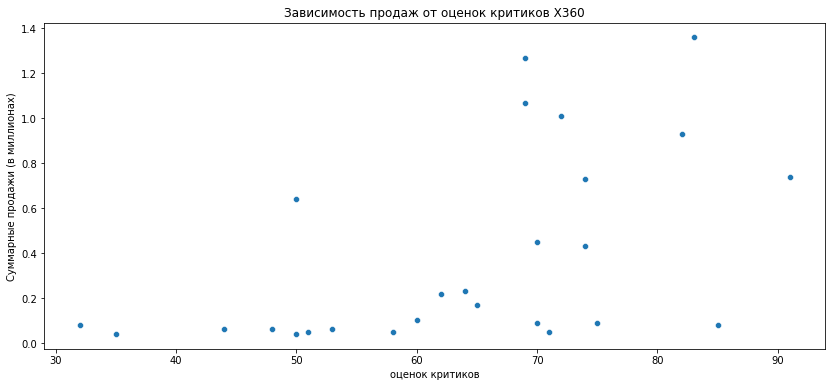

Корреляция между оценок критиков и продажами: 0.53


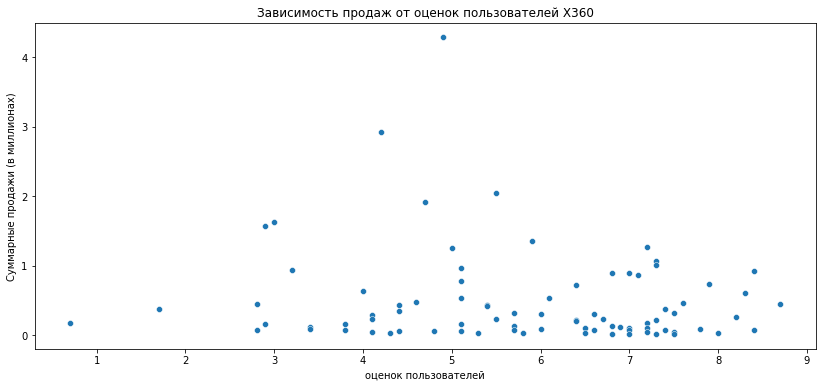

Корреляция между оценок пользователей и продажами: -0.14


In [24]:
platform_x360 = data_after_2014[data_after_2014['platform'] == 'X360']

plot_correlation(data_after_2014, 'X360', 'critic_score', 'total_sales', 'оценок критиков')

plot_correlation(data_after_2014, 'X360', 'user_score', 'total_sales', 'оценок пользователей')

***Промежуточный вывод:***

1. Корреляция между отзывами критиков и продажами: Значение корреляции составляет 0.53, что указывает на умеренно сильную положительную связь между оценками критиков и продажами игр на платформе X360. Это значит, что высокие оценки критиков положительно влияют на уровень продаж и чем выше оценка критиков, тем больше вероятность успеха игры.

2. Корреляция между отзывами пользователей и продажами: Значение корреляции равно -0.14, что указывает на слабую отрицательную связь между оценками пользователей и продажами. Это означает, что оценки пользователей не имеют значительного влияния на уровень продаж.

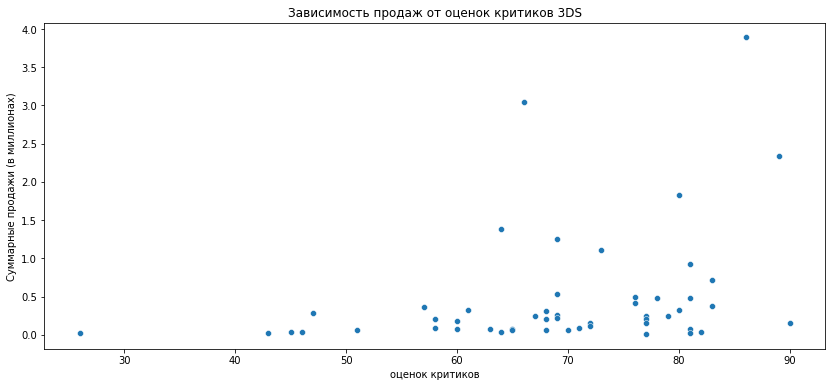

Корреляция между оценок критиков и продажами: 0.31


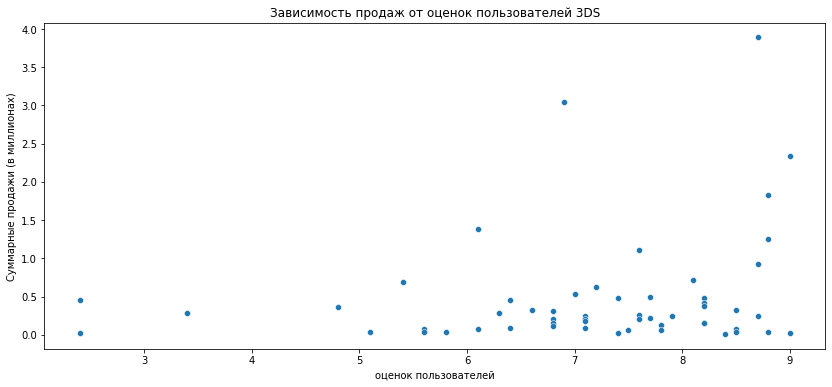

Корреляция между оценок пользователей и продажами: 0.22


In [25]:
platform_3ds = data_after_2014[data_after_2014['platform'] == '3DS']

plot_correlation(data_after_2014, '3DS', 'critic_score', 'total_sales', 'оценок критиков')

plot_correlation(data_after_2014, '3DS', 'user_score', 'total_sales', 'оценок пользователей')

***Промежуточный вывод:***

1. Корреляция между отзывами критиков и продажами: Значение корреляции составляет 0.31, что указывает на слабую положительную связь между оценками критиков и продажами игр на платформе 3DS. Это означает, что высокие оценки критиков могут умеренно способствовать увеличению продаж игр, но эта связь не является сильной.

2. Корреляция между отзывами пользователей и продажами: Значение корреляции составляет 0.22, что также указывает на слабую положительную связь между оценками пользователей и продажами игр. Эта связь слабее по сравнению с влиянием критиков, но тем не менее пользовательские оценки могут в некоторой степени способствовать повышению уровня продаж.

***Вывод***

***Корреляция между отзывами критиков и продажами:***

- `PS4`: 0.40 — Умеренная положительная связь. Продажи игр на PS4 значительно зависели от высоких оценок критиков, что говорит о важности рецензий для успеха игры на этой платформе.
- `XOne`: 0.43 — Умеренная положительная связь. Игроки Xbox One также учитывали рецензии критиков при выборе игр, что подтверждает значимость оценок критиков для успеха платформы.
- `PS3`: 0.45 — Умеренная связь, самая высокая среди рассмотренных платформ. Оценки критиков играли важную роль при выборе игр для PS3, что говорит о серьезном подходе аудитории к качеству контента.
- `X360`: 0.53 — Сильная положительная связь, наибольшая среди платформ. Игроки Xbox 360 явно ориентировались на оценки критиков, и их рецензии играли важную роль в формировании успеха игр.
- `3DS`: 0.31 — Слабая положительная связь. Хотя критики оказывали некоторое влияние на продажи, оно не было таким значительным, как на других платформах.

***Корреляция между отзывами пользователей и продажами:***

- `PS4`: -0.04 — Практически отсутствует связь. Пользовательские оценки на PS4 не оказывали существенного влияния на продажи игр.
- `XOne`: -0.07 — Очень слабая отрицательная связь. Отзывы пользователей Xbox One практически не влияли на продажи, возможно, из-за меньшего доверия к пользовательским мнениям.
- `PS3`: -0.17 — Слабая отрицательная связь. Пользовательские оценки на PS3 оказали небольшое отрицательное влияние на продажи.
- `X360`: -0.14 — Слабая отрицательная связь. Пользователи Xbox 360, меньше полагались на пользовательские отзывы при выборе игр.
- `3DS`: 0.22 — Слабая положительная связь. Игроки 3DS частично учитывали отзывы пользователей, но влияние этих оценок на продажи было небольшим.

***Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?***

In [26]:
genre_sales = data_after_2014.groupby('genre').agg(total_sales=('total_sales', 'sum'), count=('total_sales', 'count')).reset_index()

In [27]:
genre_sales['median_sales'] = data_after_2014.groupby('genre')['total_sales'].median().values

genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

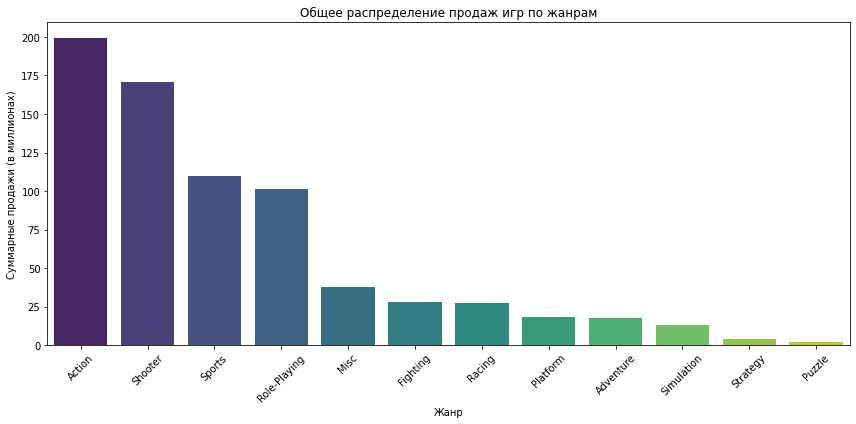

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales', palette='viridis')
plt.title('Общее распределение продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

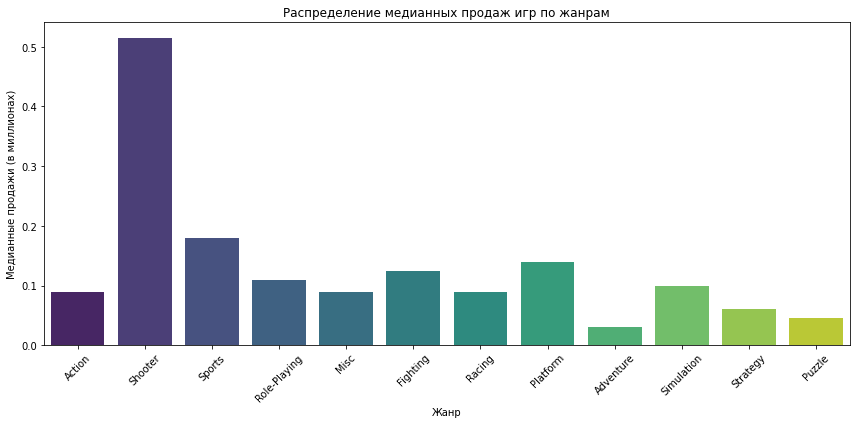

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='median_sales', palette='viridis')
plt.title('Распределение медианных продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи (в миллионах)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Вывод***

Жанр `Action` выделяется по суммарным продажам как самый прибыльный, что подтверждает его популярность среди игроков. Однако, медианные продажи для этого жанра ниже по сравнению с `Shooter`, что говорит о том, что успешность игр в этом жанре больше зависит от единичных хитов, чем от стабильных продаж каждой игры.

`Shooter` показывает не только высокие суммарные продажи, но и наивысшие медианные значения, что говорит о стабильности продаж для большинства игр этого жанра. Это делает жанр `Shooter` одним из самых прибыльных и надежных для издателей.

`Sports` также является прибыльным жанром, с хорошими суммарными и медианными продажами. В отличие от `Action`, жанр `Sports` показывает большую стабильность успеха игр.

Жанры с низкими продажами, такие как `Puzzle`, `Strategy` и `Simulation`, имеют как низкие суммарные, так и медианные продажи, что указывает на их менее широкую аудиторию. Это может быть связано с тем, что эти жанры ориентированы на более узкие сегменты игроков, который привлекает ограниченное число пользователей.

***Общий вывод***

`1. Продажи игр на различных платформах`:

- Периоды роста и спада: Анализ продаж платформ, таких как PS4, XOne, PS3, X360 и 3DS, показал, что платформы обычно достигают пика продаж через 2–4 года после выхода, а затем начинают снижаться. Это подтверждает короткий жизненный цикл современных игровых консолей, который составляет около 4-5 лет.
- Влияние отзывов: Для современных платформ, таких как PS4 и XOne, обнаружена умеренная положительная связь между отзывами критиков и продажами, с корреляцией до 0.43. При этом отзывы пользователей оказывали слабое влияние на продажи, часто с корреляцией около 0.1 или даже отрицательной.


`2. Влияние оценок критиков и пользователей на продажи`:

- Отзывы критиков: Отзывы критиков играют важную роль в продажах игр. Платформы, такие как PS4, PS3, и XOne, демонстрируют значительную корреляцию между оценками критиков и продажами, от 0.4 до 0.53. Это говорит о том, что игроки ориентируются на мнение профессионалов при принятии решения о покупке игр.
- Отзывы пользователей: Влияние оценок пользователей на продажи оказалось слабым или даже отрицательным для всех платформ, включая PS3, X360 и PS4. Это означает, что игроки меньше полагаются на мнение других пользователей и больше учитывают профессиональные обзоры.


`3. Распределение по жанрам и самые прибыльные жанры`:

- Action и Shooter: Жанры Action и Shooter остаются самыми прибыльными жанрами, благодаря динамичному и захватывающему геймплею. Они обладают высокой суммарной продажей и стабильными медианными продажами, что делает их привлекательными для разработчиков и издателей.
- Sports: Жанр Sports также показывает высокие суммарные продажи, но медианные продажи ниже, что указывает на успех отдельных игр, таких как FIFA.
- Низкие продажи: Жанры, такие как Puzzle, Strategy и Simulation, имеют низкие как суммарные, так и медианные продажи. Они ориентированы на узкие группы игроков и не так популярны на массовом рынке.

#### Шаг 4. Составьте портрет пользователя каждого региона

###### Определите для пользователя каждого региона (NA, EU, JP):

***Самые популярные платформы (топ-5). Опишите различия в долях продаж.***

In [30]:
na_platform_sales = data_after_2014.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_platform_sales = data_after_2014.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_platform_sales = data_after_2014.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

total_na_sales = na_platform_sales['na_sales'].sum()
total_eu_sales = eu_platform_sales['eu_sales'].sum()
total_jp_sales = jp_platform_sales['jp_sales'].sum()

In [31]:
top_5_na = na_platform_sales.head(5)
others_na = total_na_sales - top_5_na['na_sales'].sum()
top_5_na = top_5_na.append({'platform': 'Other', 'na_sales': others_na}, ignore_index=True)

top_5_eu = eu_platform_sales.head(5)
others_eu = total_eu_sales - top_5_eu['eu_sales'].sum()
top_5_eu = top_5_eu.append({'platform': 'Other', 'eu_sales': others_eu}, ignore_index=True)

top_5_jp = jp_platform_sales.head(5)
others_jp = total_jp_sales - top_5_jp['jp_sales'].sum()
top_5_jp = top_5_jp.append({'platform': 'Other', 'jp_sales': others_jp}, ignore_index=True)

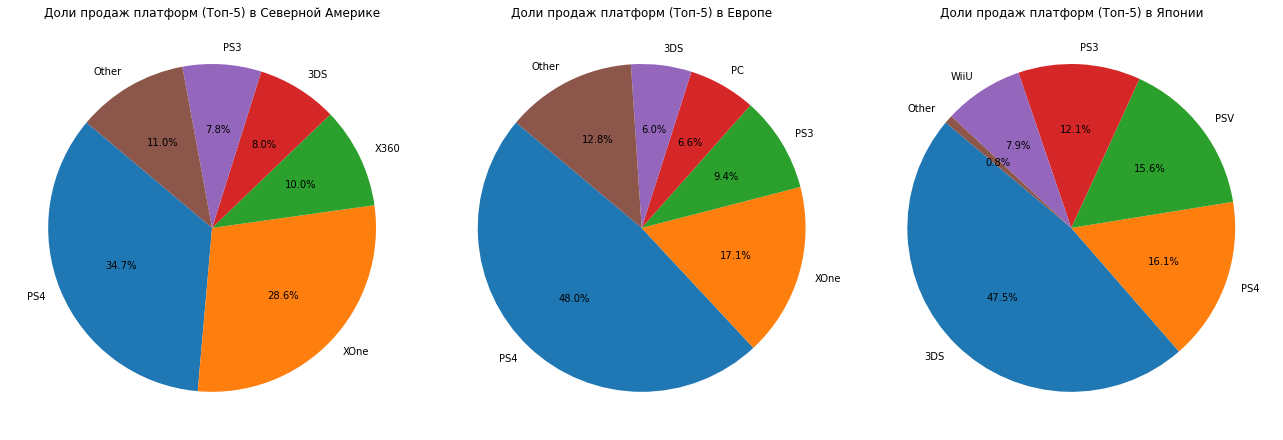

In [32]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.pie(top_5_na['na_sales'], labels=top_5_na['platform'], autopct='%1.1f%%', startangle=140)
plt.title('Доли продаж платформ (Топ-5) в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(top_5_eu['eu_sales'], labels=top_5_eu['platform'], autopct='%1.1f%%', startangle=140)
plt.title('Доли продаж платформ (Топ-5) в Европе')

plt.subplot(1, 3, 3)
plt.pie(top_5_jp['jp_sales'], labels=top_5_jp['platform'], autopct='%1.1f%%', startangle=140)
plt.title('Доли продаж платформ (Топ-5) в Японии')

plt.tight_layout()
plt.show()

***Вывод:***

1. Северная Америка (NA):

Платформа PS4 занимает наибольшую долю продаж в Северной Америке (34.7%). Следующей по популярности является Xbox One, которая занимает 28.6%.
Платформы X360 и 3DS занимают третье и четвертое места с долями в 10% и 11%, соответственно. PS3 также попадает в топ-5 с долей продаж в 8%.
В Северной Америке конкуренция сосредоточена в основном между Sony и Microsoft, причем PS4 и Xbox One значительно выделяются на фоне остальных.


2. Европа (EU):

В Европе PS4 значительно доминирует, занимая 48% продаж. Xbox One занимает второе место с 17.1% долей продаж.
За ними следуют PC (6.6%) и PS3 (9.4%). Платформа 3DS занимает пятую позицию с долей в 6%.
В Европе PS4 значительно превосходит остальные платформы по продажам, что свидетельствует о её огромной популярности среди европейских геймеров.


3. Япония (JP):

В Японии 3DS занимает лидирующую позицию с долей продаж в 47.5%. Следующими идут PSV (15.6%) и PS4 (16.1%).
PS3 и WiiU занимают следующие позиции с долями 12.1% и 7.9%, соответственно.
В отличие от Северной Америки и Европы, в Японии значительно большее внимание уделяется портативным консолям, что подтверждается доминирующей долей 3DS и значительной долей PSV.

***Самые популярные жанры (топ-5). Поясните разницу.***

In [33]:
na_genre_sales = data_after_2014.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_genre_sales = data_after_2014.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_genre_sales = data_after_2014.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

na_genre_sales_top5 = na_genre_sales.head(5)
eu_genre_sales_top5 = eu_genre_sales.head(5)
jp_genre_sales_top5 = jp_genre_sales.head(5)

display(na_genre_sales_top5)
display(eu_genre_sales_top5)
display(jp_genre_sales_top5)

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


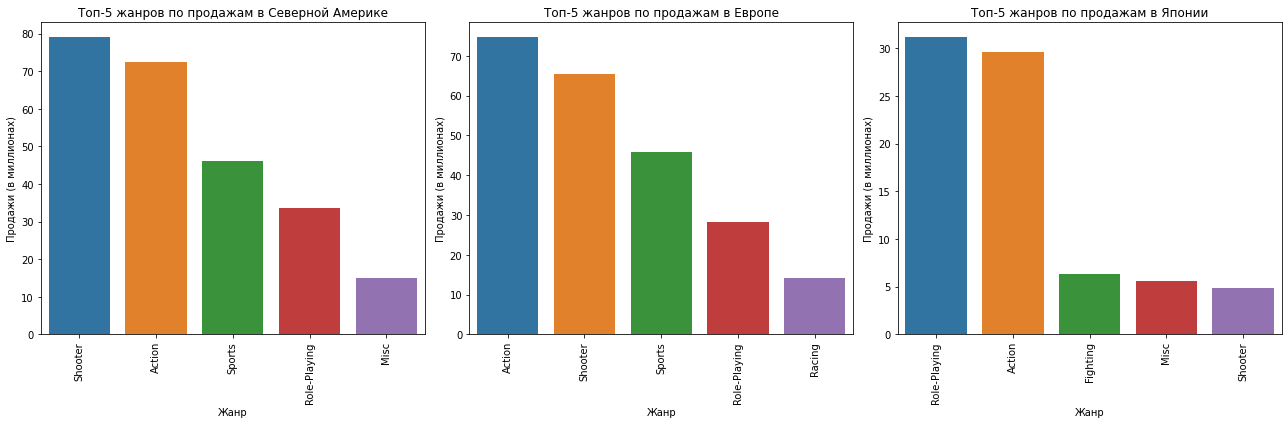

In [34]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=na_genre_sales_top5, x='genre', y='na_sales')
plt.title('Топ-5 жанров по продажам в Северной Америке')
plt.xlabel('Жанр')
plt.xticks(rotation=90)
plt.ylabel('Продажи (в миллионах)')

plt.subplot(1, 3, 2)
sns.barplot(data=eu_genre_sales_top5, x='genre', y='eu_sales')
plt.title('Топ-5 жанров по продажам в Европе')
plt.xlabel('Жанр')
plt.xticks(rotation=90)
plt.ylabel('Продажи (в миллионах)')

plt.subplot(1, 3, 3)
sns.barplot(data=jp_genre_sales_top5, x='genre', y='jp_sales')
plt.title('Топ-5 жанров по продажам в Японии')
plt.xlabel('Жанр')
plt.xticks(rotation=90)
plt.ylabel('Продажи (в миллионах)')

plt.tight_layout()
plt.show()

1. Северная Америка (NA):

- Топ-5 жанров: Shooter, Action, Sports, Role-Playing, Misc.
- Жанр Shooter лидирует по продажам, занимая около 70 миллионов копий. Это подтверждает популярность динамичных игр среди североамериканских игроков.
- Action и Sports занимают второе и третье места, также показывая высокие объемы продаж в регионе. Action отличается насыщенным геймплеем, а Sports популярны благодаря множеству спортивных игр.
- Role-Playing и Misc занимают четвертое и пятое места, хотя их доли значительно меньше по сравнению с лидерами.

2. Европа (EU):

- Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing.
- В Европе Action лидирует с продажами более 70 миллионов копий. Это подтверждает высокую востребованность игр с динамичным геймплеем.
- Shooter и Sports занимают второе и третье места соответственно. Игры жанра Sports также популярны, что свидетельствует о важной роли спортивных франшиз.
- Role-Playing и Racing дополняют топ-5, что указывает на любовь европейских игроков к гоночным и ролевым играм.

3. Япония (JP):

- Топ-5 жанров: Role-Playing, Action, Fighting, Misc, Shooter.
- Role-Playing (RPG) доминирует в Японии с суммарными продажами более 30 миллионов копий.
- Action занимает второе место, что подтверждает популярность игр с активным геймплеем, но его продажи заметно ниже, чем у RPG.
- Fighting, Misc, и Shooter занимают оставшиеся места в топ-5, что подчеркивает интерес японских игроков к разным типам геймплея.

В Северной Америке и Европе доминируют жанры ***Shooter, Action, и Sports***, что подчеркивает любовь к динамичным и соревновательным играм. 

В Японии же жанр ***RPG*** явно выделяется на фоне других, что указывает на предпочтение японских игроков к сюжетным и ролевым играм.

***Влияет ли рейтинг ESRB на продажи в отдельном регионе?***

In [35]:
na_esrb_sales = data_after_2014.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_esrb_sales = data_after_2014.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_esrb_sales = data_after_2014.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

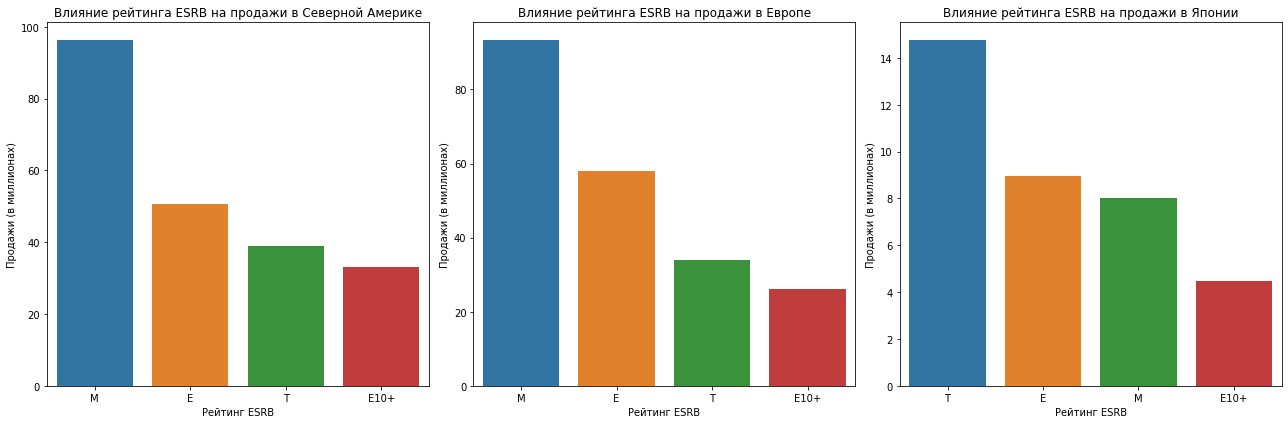

In [36]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=na_esrb_sales, x='rating', y='na_sales')
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в миллионах)')

plt.subplot(1, 3, 2)
sns.barplot(data=eu_esrb_sales, x='rating', y='eu_sales')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в миллионах)')

plt.subplot(1, 3, 3)
sns.barplot(data=jp_esrb_sales, x='rating', y='jp_sales')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в миллионах)')

plt.tight_layout()
plt.show()

In [37]:
data_unknown_rating = data.copy()
data_unknown_rating['rating'] = data_unknown_rating['rating'].fillna('unknown')

In [38]:
na_esrb_sales = data_unknown_rating.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_esrb_sales = data_unknown_rating.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_esrb_sales = data_unknown_rating.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

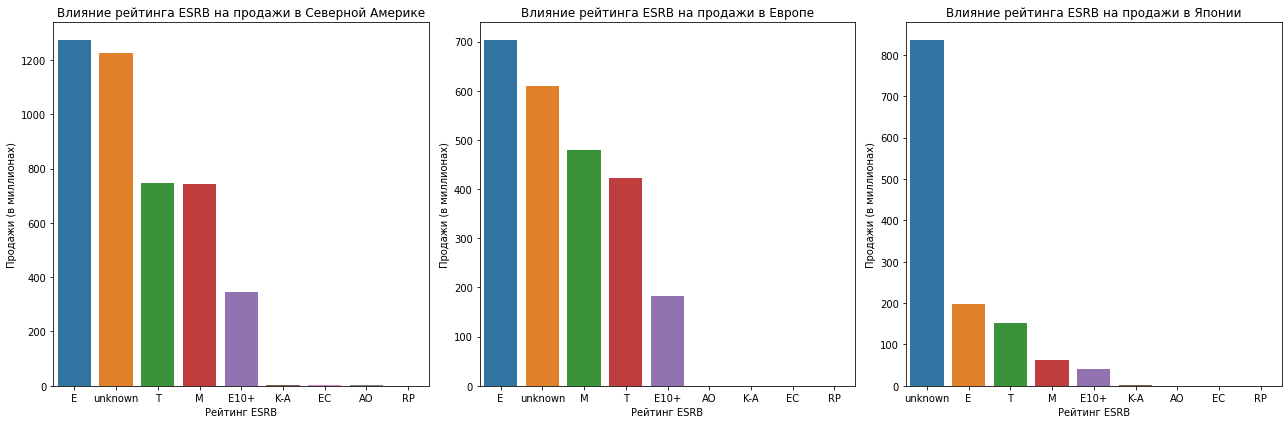

In [39]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=na_esrb_sales, x='rating', y='na_sales')
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в миллионах)')

plt.subplot(1, 3, 2)
sns.barplot(data=eu_esrb_sales, x='rating', y='eu_sales')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в миллионах)')

plt.subplot(1, 3, 3)
sns.barplot(data=jp_esrb_sales, x='rating', y='jp_sales')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в миллионах)')

plt.tight_layout()
plt.show()

***Краткое описание маркировок:***
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults").


- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.


- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.


- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.


- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. С 1 марта 2018 года этот рейтинг больше не используется и заменяется на Everyone по причине того, что этот рейтинг имели менее 300 игр.

1. Северная Америка (NA):
- Рейтинг M (Mature) занимает лидирующую позицию с общими продажами около 100 миллионов копий. Это говорит о высоком интересе североамериканских игроков к играм, предназначенным для взрослой аудитории.
- Рейтинг E (Everyone) находится на втором месте с продажами около 60 миллионов копий, что подтверждает популярность игр для всех возрастов.
- Рейтинг T (Teen) занимает третье место с продажами около 40 миллионов копий, что говорит о заметном интересе к играм для подростков.
- Рейтинг E10+ имеет самые низкие продажи среди представленных, что указывает на меньший интерес аудитории к играм, ориентированным на детей старше 10 лет.

2. Европа (EU):
- Рейтинг M также является лидером в Европе, с продажами около 90 миллионов копий. Это подчеркивает интерес европейских игроков к играм для взрослой аудитории.
- Рейтинг E занимает второе место с продажами около 70 миллионов копий, что свидетельствует о популярности игр, предназначенных для всей семьи.
- Рейтинг T находится на третьем месте с продажами около 50 миллионов копий, что говорит о стабильном интересе к играм для подростков.
- Рейтинг E10+ имеет самые низкие продажи, что подтверждает меньший интерес к играм для детей старше 10 лет.

3. Япония (JP):
- Рейтинг T занимает лидирующую позицию в Японии с продажами около 14 миллионов копий. Это говорит о высоком интересе японской аудитории к играм для подростков.
- Рейтинг E занимает второе место с продажами около 10 миллионов копий, что указывает на популярность семейных игр.
- Рейтинг M занимает третье место с продажами около 8 миллионов копий, что говорит о некотором интересе к играм для взрослой аудитории.
- Рейтинг E10+ имеет самые низкие продажи, что указывает на сравнительно низкий интерес к играм для детей старше 10 лет.

***Общий вывод***

1. ***Северная Америка (NA):***

- `Предпочтения по платформам:` В Северной Америке наиболее популярными платформами являются PS4, Xbox One, и X360. PS4 занимает лидирующую позицию, что говорит о большой популярности платформы среди американских геймеров.

- `Популярные жанры:` Наиболее популярные жанры в Северной Америке — Shooter, Action, и Sports. Это говорит о предпочтении активного, динамичного игрового процесса, а также о высоком интересе к спортивным играм и шутерам.

- `Рейтинг ESRB:` Игры с рейтингом M (Mature) имеют наибольшие продажи, что говорит о высокой популярности игр для взрослой аудитории. Также популярны игры с рейтингами E (Everyone) и T (Teen), что указывает на интерес к играм для всей семьи и подростков.

2. ***Европа (EU):***

- `Предпочтения по платформам:` В Европе наиболее популярными платформами являются PS4, Xbox One, и PS3. PS4 занимает лидирующую позицию, что свидетельствует о популярности консолей Sony среди европейских геймеров.

- `Популярные жанры:` В Европе наибольшую популярность имеют жанры Action, Shooter, и Sports, что совпадает с предпочтениями NA аудитории. Европейские пользователи также ценят активный и соревновательный геймплей.

- `Рейтинг ESRB:` Игры с рейтингом M (Mature) также лидируют по продажам, что говорит о популярности игр для взрослой аудитории. В то же время высокие продажи имеют и игры с рейтингами E (Everyone) и T (Teen), что указывает на широкую аудиторию, включая как детей, так и взрослых.

3. ***Япония (JP):***

- `Предпочтения по платформам:` В Японии наибольшую популярность имеют 3DS, PS4, и PSV. 3DS лидирует по продажам, что свидетельствует о высокой популярности портативных консолей среди японских игроков.

- `Популярные жанры:` Жанр Role-Playing (RPG) является самым популярным в Японии, что значительно отличает японских игроков от западных. Это говорит о предпочтении глубоких сюжетных игр. Также популярны жанры Action и Fighting, но их популярность значительно уступает RPG.

- `Рейтинг ESRB:` В Японии также лидирует рейтинг T (Teen), что подтверждает популярность игр для подростков. Рейтинг E (Everyone) также занимает значительную долю.

#### Шаг 5. Проверьте гипотезы

***Задайте самостоятельно пороговое значение alpha.***

alpha = 0.05

Значение 0.05 является стандартным и часто используемым в статистическом анализе.

***Поясните:***

***1. Как вы сформулировали нулевую и альтернативную гипотезы;***

***2. Какой критерий применили для проверки гипотез и почему.***

***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;***

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы будет использован t-тест Стьюдента для независимых выборок. Этот критерий подходит, так как мы сравниваем средние значения двух независимых групп (платформ).

In [40]:
xbox_one_ratings = data_after_2014[(data_after_2014['platform'] == 'XOne') & (data_after_2014['user_score'].notna())]['user_score']
pc_ratings = data_after_2014[(data_after_2014['platform'] == 'PC') & (data_after_2014['user_score'].notna())]['user_score']

t_stat, p_value = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

print(f"t-статистика: {t_stat:.2f}")
print(f"p-значение: {p_value}")

t-статистика: 1.58
p-значение: 0.11601398086668832


***Вывод***

Поскольку p-значение больше уровня значимости (0.05), то у нас нет достаточных оснований отвергнуть нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами для платформ Xbox One и PC.

***Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.***

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Для проверки гипотезы будет использован t-тест Стьюдента для независимых выборок. Этот критерий подходит, так как мы сравниваем средние значения двух независимых групп (жанров).

In [41]:
action_ratings = data_after_2014[(data_after_2014['genre'] == 'Action') & (data_after_2014['user_score'].notna())]['user_score']
sports_ratings = data_after_2014[(data_after_2014['genre'] == 'Sports') & (data_after_2014['user_score'].notna())]['user_score']

t_stat, p_value = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print(f"t-статистика: {t_stat:.2f}")
print(f"p-значение: {p_value:.20f}")

t-статистика: 8.38
p-значение: 0.00000000000001182555


***Вывод***

Поскольку p-значение значительно меньше уровня значимости (0.05), у нас есть достаточные основания отвергнуть нулевую гипотезу. Это означает, что средние пользовательские рейтинги для жанров Action и Sports статистически значимо различаются.

***Общий вывод***

1. Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC: Поскольку p-значение больше уровня значимости (0.05), то у нас нет достаточных оснований отвергнуть нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами для платформ Xbox One и PC.


2. Гипотеза о средних пользовательских рейтингах жанров Action и Sports: Поскольку p-значение значительно меньше уровня значимости (0.05), у нас есть достаточные основания отвергнуть нулевую гипотезу. Это означает, что средние пользовательские рейтинги для жанров Action и Sports статистически значимо различаются.

#### Шаг 6. Напишите общий вывод

***Вывод по проделанной работе***

   ***Первым шагом работы был проведен анализ полученных данных. ***
   В наборе данных присутствовали пропущенные значения в нескольких столбцах. Например, в колонке `Year_of_Release` не хватало данных для `269 записей`, что могло повлиять на анализ временных тенденций. Столбцы `Critic_Score`, `User_Score`, и `Rating` содержали `значительное количество пропусков`, что также нужно учитывать при анализе оценок игр.

   Примерно половина игр не имела оценок критиков `Critic_Score`, а в столбце `User_Score` пропущено более `40% данных`. Это может ограничивать возможность детального анализа влияния оценок на успешность игры, и требует дополнительной обработки.

   ***В процессе подготовки данных были выполнены следующие шаги:***

  - Заменены названия столбцов(приведены к нижнему регистру);

  - Обработаны пропуски:

  - В столбце `name` были удалены `2 пропуска`, потому что строки не содержали информации, которые способствовали восстановлению данных;
  - `year_of_release` - приведен к типу int, пропущенные значения удалены.
  - `critic_score` - пропущенные значения оставленны как NaN, чтобы учитывать только реальные оценки. При дальнейшем анализе появится необходимость строить графики, а с текстовым значением unknown появятся проблемы.
  - `user_score` - значение tbd означает, что оценка не определена. Также при замене этого значения на unknown возникнут трудности с анализом, поэтому они заменены на NaN. Пропущенные значения тоже принято не заменять, чтобы не исказить анализ.
  - `rating` - пропущенные значения оставленны, чтобы не исказить анализ.
  - Добавлен столбец `total_sales` с суммарными продажами во всех регионах.

***Слудеющим этапом был исследовательский анализ данных, в ходе которого были выявлены следующие особенности:***
    
   1. ***Продажи игр на различных платформах:***

        - Периоды роста и спада: Анализ продаж платформ, таких как PS4, XOne, PS3, X360 и 3DS, показал, что платформы обычно достигают пика продаж через 2–4 года после выхода, а затем начинают снижаться. Это подтверждает короткий жизненный цикл современных игровых консолей, который составляет около 4-5 лет.
        - Влияние отзывов: Для современных платформ, таких как PS4 и XOne, обнаружена умеренная положительная связь между отзывами критиков и продажами, с корреляцией до 0.43. При этом отзывы пользователей оказывали слабое влияние на продажи, часто с корреляцией около 0.1 или даже отрицательной.
        
   2. ***Влияние оценок критиков и пользователей на продажи:***

        - Отзывы критиков: Отзывы критиков играют важную роль в продажах игр. Платформы, такие как PS4, PS3, и XOne, демонстрируют значительную корреляцию между оценками критиков и продажами, от 0.4 до 0.53. Это говорит о том, что игроки ориентируются на мнение профессионалов при принятии решения о покупке игр.
        - Отзывы пользователей: Влияние оценок пользователей на продажи оказалось слабым или даже отрицательным для всех платформ, включая PS3, X360 и PS4. Это означает, что игроки меньше полагаются на мнение других пользователей и больше учитывают профессиональные обзоры.
        
   3. ***Распределение по жанрам и самые прибыльные жанры:***

        - Action и Shooter: Жанры Action и Shooter остаются самыми прибыльными жанрами, благодаря динамичному и захватывающему геймплею. Они обладают высокой суммарной продажей и стабильными медианными продажами, что делает их привлекательными для разработчиков и издателей.
        - Sports: Жанр Sports также показывает высокие суммарные продажи, но медианные продажи ниже, что указывает на успех отдельных игр, таких как FIFA.
        - Низкие продажи: Жанры, такие как Puzzle, Strategy и Simulation, имеют низкие как суммарные, так и медианные продажи. Они ориентированы на узкие группы игроков и не так популярны на массовом рынке.

***Далее был составлен портрет пользователя каждого региона (NA, EU, JP):***
        
   1. ***Северная Америка (NA):***

        - `Предпочтения по платформам:` В Северной Америке наиболее популярными платформами являются PS4, Xbox One, и X360. PS4 занимает лидирующую позицию, что говорит о большой популярности платформы среди американских геймеров.

        - `Популярные жанры:` Наиболее популярные жанры в Северной Америке — Shooter, Action, и Sports. Это говорит о предпочтении активного, динамичного игрового процесса, а также о высоком интересе к спортивным играм и шутерам.

        - `Рейтинг ESRB:` Игры с рейтингом M (Mature) имеют наибольшие продажи, что говорит о высокой популярности игр для взрослой аудитории. Также популярны игры с рейтингами E (Everyone) и T (Teen), что указывает на интерес к играм для всей семьи и подростков.

   2. ***Европа (EU):***

        - `Предпочтения по платформам:` В Европе наиболее популярными платформами являются PS4, Xbox One, и PS3. PS4 занимает лидирующую позицию, что свидетельствует о популярности консолей Sony среди европейских геймеров.

        - `Популярные жанры:` В Европе наибольшую популярность имеют жанры Action, Shooter, и Sports, что совпадает с предпочтениями NA аудитории. Европейские пользователи также ценят активный и соревновательный геймплей.

        - `Рейтинг ESRB:` Игры с рейтингом M (Mature) также лидируют по продажам, что говорит о популярности игр для взрослой аудитории. В то же время высокие продажи имеют и игры с рейтингами E (Everyone) и T (Teen), что указывает на широкую аудиторию, включая как детей, так и взрослых.

   3. ***Япония (JP):***

        - `Предпочтения по платформам:` В Японии наибольшую популярность имеют 3DS, PS4, и PSV. 3DS лидирует по продажам, что свидетельствует о высокой популярности портативных консолей среди японских игроков.

        - `Популярные жанры:` Жанр Role-Playing (RPG) является самым популярным в Японии, что значительно отличает японских игроков от западных. Это говорит о предпочтении глубоких сюжетных игр. Также популярны жанры Action и Fighting, но их популярность значительно уступает RPG.

        - `Рейтинг ESRB:` В Японии также лидирует рейтинг T (Teen), что подтверждает популярность игр для подростков. Рейтинг E (Everyone) также занимает значительную долю.

***И последним этапом была проведена проверка гипотез:***
        
   - Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC: Поскольку p-значение больше уровня значимости (0.05), то у нас нет достаточных оснований отвергнуть нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами для платформ Xbox One и PC.
        
   - Гипотеза о средних пользовательских рейтингах жанров Action и Sports: Поскольку p-значение значительно меньше уровня значимости (0.05), у нас есть достаточные основания отвергнуть нулевую гипотезу. Это означает, что средние пользовательские рейтинги для жанров Action и Sports статистически значимо различаются.

#### Рекомендации

- `Учесть различия в предпочтениях пользователей на разных платформах.` Игры, которые популярны на одной платформе, могут не получать такую же поддержку на другой, поэтому необходимо адаптировать контент под каждую платформу.

- `Учитывать универсальность жанров.` Это означает, что разработчики могут ориентироваться на оба жанра при выпуске массовых проектов, которые должны быть популярны широкой аудитории.

- `Использование рейтингов и продаж для анализа.` Анализ взаимосвязи между рейтингами и продажами показал, что влияние пользовательских оценок на продажи относительно невелик, так как корреляция между ними была слабой.Рекомендуется развивать систему оценок пользователями для улучшения качества игр и для лучшего понимания потребностей аудитории. 

- `Оптимизация маркетинговых стратегий.` Для повышения продаж на разных платформах необходимо учитывать разницу в пользовательских предпочтениях и адаптировать маркетинговые стратегии в зависимости от региона и платформы.